Pour la prédicition des prix immobiliers, le modèle de régression polynomiale avec une prédiction de 81.8% n'est pas le plus fiable. Par cnséquent, nous allons appliquer deux autres modèles de prédicition : Arbre de Décision et Random Forest.

# 1. Importer les librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import datetime
import seaborn as sns

# 2. Charger le fichier

In [2]:
path='chemin du repertoire/kc_house_data.csv'
data = pd.read_csv(path, delimiter=',', header=0, index_col=None)
data["date"] = pd.to_datetime(data["date"],format='%Y-%m-%d') #Transformation de la colonne "date"

# 3. Analyse exploratoire

In [3]:
# Afficher les 5 premières lignes des données
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Afficher le nombre de lignes et de colonnes
data.shape

(21613, 21)

In [5]:
# Afficher les noms des colonnes
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### Dictionnaire des variables

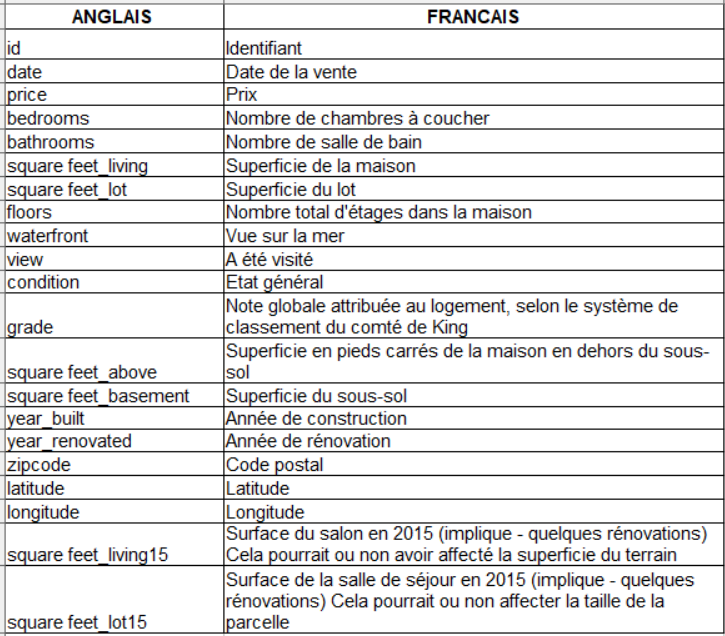

In [6]:
# On affiche le dictionnaire des langues
from IPython.display import Image
Image (filename = "chemin du repertoire/Dictionnaire.png", width=500, height=500)

<Figure size 432x288 with 0 Axes>

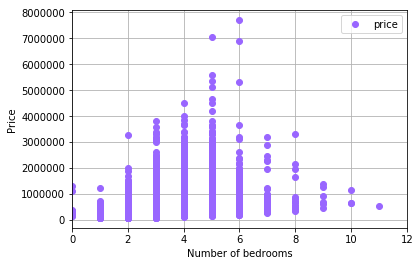

In [7]:
#1. Prix en fonction du nombre de chambres
plt.figure()
data.plot(x='bedrooms', y='price', c = '#9966ff', marker = 'o', linewidth = 0)
plt.xlim([0, 12])
plt.grid()
plt.xlabel('Number of bedrooms')
plt.ylabel('Price')
plt.show()

On remarque que plus le nombre de chambres à coucher est important, plus le prix est élevé.

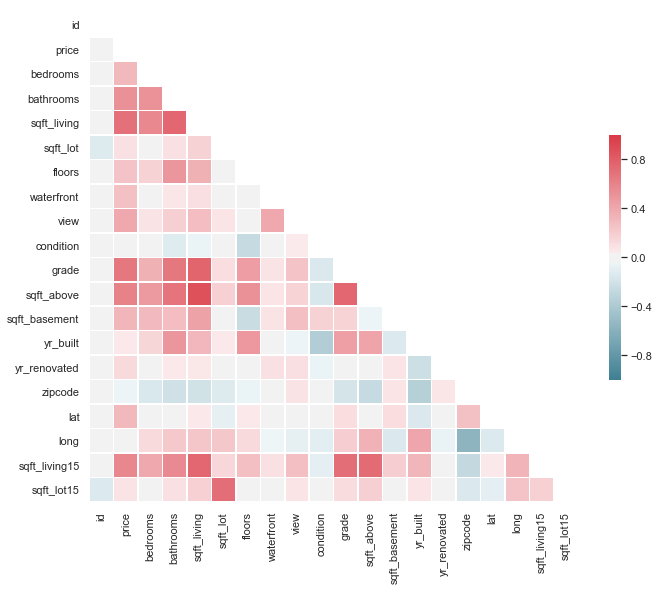

In [8]:
# Définir la couleur du fond
sns.set(style="white")

# Calcul de la matrice de corrélation
corr = data.corr()

# Masque diagonale
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

On remarque 4 variables significatives en corrélation avec le prix : salle de bain, superficie de la maison, superficie en dehors du sous-sol et note globale selon le classement.

In [9]:
# On supprime les variables non significatives
X= data.drop(['price','date','id'], axis=1)
y= data['price']

X.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


# 4. Modèles de Prédiction

## 4.a) Arbre de décision

In [10]:
# Importer les librairies pour le machine learning
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [11]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test) 
rmse = (np.sqrt(mean_squared_error(y_test,y_pred)))
r2 = r2_score(y_test, y_pred)

print('Root Mean Squared Error is {}'.format(rmse))
print('R2 score is {}'.format(r2))

Root Mean Squared Error is 161552.03784275983
R2 score is 0.7805404978688906


### Evaluation du modèle

In [19]:
# On applique le modèle Random Forest sur le test set
predictions = regressor.predict(X_test)
# Calcul de l'erreur absolue
errors = abs(y_test - y_pred)
# Calcul de l'erreur moyenne absolue
mape = 100 * (errors / y_pred)
# Afficher l'erreur moyenne absolue
print('Mean Absolute Error:', round(np.mean(errors), 2), 'dollars.')
# Calcul de la précision
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 93210.83 dollars.
Accuracy: 82.01 %.


Avec Arbre de décision, prédiction de 82%. Peu de préparation des données (pas de normalisation, de valeurs vides à supprimer, ou de variable muette).Le modèle peut gérer à la fois des valeurs numériques et des catégories. Cependant, L'apprentissage par arbre de décision peut amener des arbres de décision très complexes, qui généralisent mal l'ensemble d'apprentissage (overfitting).

## 4.b) Random Forest

In [13]:
X2= data.drop(['price','date','id'], axis=1)
y2= data['price']

X2.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2,random_state=0) 

#### Evaluation du modèle Random Forest avec 40 arbres de décisions

In [15]:
regressor = RandomForestRegressor(n_estimators=40)  
regressor.fit(X2_train, y2_train)  
y2_pred = regressor.predict(X2_test)  
rmse = (np.sqrt(mean_squared_error(y2_test,y2_pred)))
r2 = r2_score(y2_test, y2_pred)

print('Root Mean Squared Error is {}'.format(rmse)) # erreur quadratique moyenne
print('R2 score is {}'.format(r2))  

Root Mean Squared Error is 115499.25261200672
R2 score is 0.8878271236575253


In [16]:
# On applique le modèle Random Forest sur le test set
predictions = regressor.predict(X2_test)

# Calcul de l'erreur absolue
errors = abs(y2_test - y2_pred)

# Afficher l'erreur moyenne absolue
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 66098.87 degrees.


In [17]:
# Calculate mean absolute percentage error (mape) ou erreur moyenne absolue en pourcentage 
mape = 100 * (errors / y2_pred)

# Calcul de la précision
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 87.98 %.


Avec Random Forest, prédiction de 88.02%.

# 5.Conclusion Arbre de Décision / Random Forest

88.02% > 82% : Random Forest plus performant que l'Arbre de décision. La "puissance de la foule" (ensemble d'arbres de décision) confère un modèle plus stable qu'avec un seul arbre de décision.